<a href="https://colab.research.google.com/github/susuusub/projectmanager/blob/main/%ED%86%B5%EA%B3%843%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 복습

먼저 car.xlsx 파일을 열어봅시다

In [ ]:
import pandas as pd
df = pd.read_excel('car.xlsx')
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


`mileage`의 기술 통계
- 평균
- 중간값
- 표준편차

In [ ]:
df.mileage.mean() # 평균

77483.22262773722

In [ ]:
df['mileage'].median()  # 중간값

71649.0

In [ ]:
import seaborn as sns
sns.boxplot(x='mileage', data=df)

In [ ]:
df.mileage.std() # 표준편차

43015.79445317075

In [ ]:
df.mileage.describe() # 기술통계 모두 구하기

count       274.000000
mean      77483.222628
std       43015.794453
min        2287.000000
25%       47597.500000
50%       71649.000000
75%      103193.750000
max      310000.000000
Name: mileage, dtype: float64

`mileage`의 95% 신뢰구간

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg
pg.ttest(df.mileage, 0, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,29.816386,273,two-sided,7.513310e-88,"[72367.22, 82599.22]",1.801274,1.384e+84,1.0


In [ ]:
# 모집단에서 전수조사를 한다면 평균은 아마도 72367~82599 정도로 나올 거다
# 구간을 좁히려면(오차범위를 줄이려면) 데이터를 더 많이 모으면 됨

In [ ]:
pg.ttest(df.price, 850, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.182174,273,two-sided,0.855581,"[814.1, 893.22]",0.011006,0.069,0.053784


In [ ]:
0.008028 < 0.05 # 800만원의 경우에는 p < 유의수준 이므로 신뢰구간에 포함 X

True

In [ ]:
0.855581 < 0.05 # 850만원의 경우에는 p > 유의수준 이므로 신뢰구간에 포함 O

False

In [ ]:
df

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570
...,...,...,...,...,...,...
269,235000,Avante,390,2007,1473730,507260
270,140000,Avante,430,2009,14399366,4592589
271,96757,Avante,390,2006,303080,0
272,113853,Avante,390,2008,320780,1857718


In [ ]:
avante = df.price[df.model == 'Avante'] # 모델이 Avante인 차량의 가격
k3 = df.price[df.model == 'K3'] # 모델이 K3인 차량의 가격

In [ ]:
avante.mean()

833.4146341463414

In [ ]:
k3.mean()

913.8115942028985

In [ ]:
pg.ttest(avante, k3, confidence=0.95) # 두 집단의 평균을 비교

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


Avante 평균 - K3 평균이 표본에서 -80만원인데 모집단에서는 95% 신뢰구간이 -152 ~ -8
어쨌든 모집단에서 Avante의 평균이 K3의 평균보다 낮다는 결론

---

귀무가설(기각할 가설): 둘이 똑같다(평균 차이 = 0)

0.028187 < 0.05

귀무가설 기각 -> 둘은 평균이 다르다

"통계적으로 유의한 차이"(Avante와 K3의 차이를 확인할 수 있을만큼 데이터가 충분하다)

귀무가설 기각이 안되면 -> 둘의 평균이 같다(X) -> 이럴 수도(Avante가 더 비쌀 수도) 있고, 저럴 수도(K3가 더 비쌀 수도) 있다

신뢰수준(또는 유의수준)은 여러분이 감당할 수 있는 수준에서 결정하면 됨
- 좀 틀려도 괜찮다 95%(즉 5% 정도는 틀려도 됨)- 아 이건 좀 틀리면 곤란한데.. 99%(즉 1%정도만 틀리겠다)


In [ ]:
df

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570
...,...,...,...,...,...,...
269,235000,Avante,390,2007,1473730,507260
270,140000,Avante,430,2009,14399366,4592589
271,96757,Avante,390,2006,303080,0
272,113853,Avante,390,2008,320780,1857718


In [ ]:
pg.corr(df.price, df.mileage)

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


- r(표본상관계수): -0.67616
    - 부호가 - => 서로 반대로 움직인다
    - 많이 돌아다닌 차는 가격이 떨어진다
- 모집단에서는 어떨까?
    - 95% 신뢰구간: -0.74 ~ -0.61  
- 귀무가설: 모집단 상관계수 = 0(관련이 없다)
    - 5.809388e-38 < 0.05
    - 귀무가설 기각 => 관련이 있다

In [ ]:
5.809388e-38 < 0.05

True

In [ ]:
df.corr(numeric_only=True)

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


<Axes: xlabel='mileage', ylabel='price'>

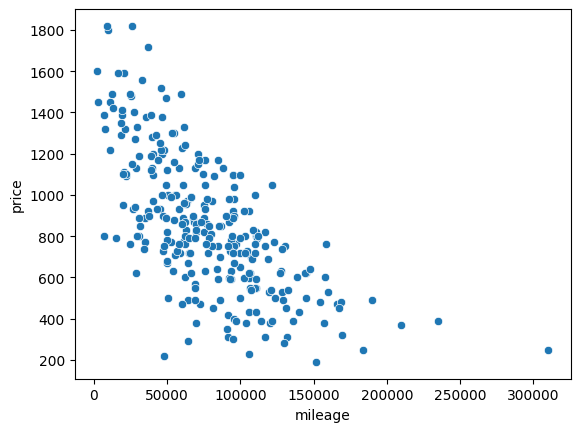

In [ ]:
import seaborn as sns
sns.scatterplot(x='mileage', y='price', data=df)

In [ ]:
from statsmodels.formula.api import ols
m = ols('price ~ mileage', data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.81e-38
Time:                        04:10:31   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

회귀분석에서 계수의 p-value
귀무가설: 모집단에서 기울기 = 0
         주행거리가 많든 적든 가격과는 무관
p < 0.05: 귀무가설 기각 => 주행거리는 가격과 유관

<Axes: xlabel='mileage', ylabel='price'>

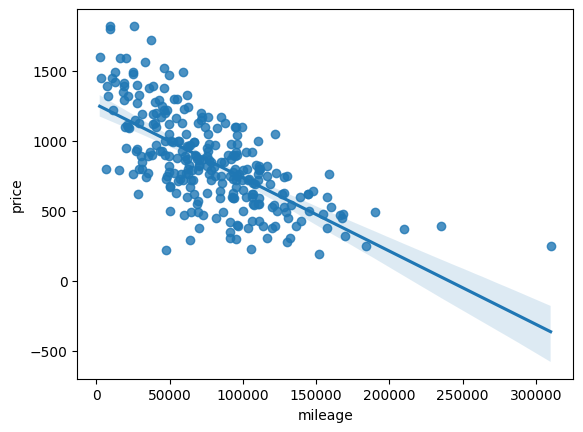

In [ ]:
sns.regplot(x='mileage', y='price', data=df)